### Importing Libraries

In [24]:
import pandas as pd # Biblioteca usada para acessar DataFrames e gerar estatísticas
import numpy as np # Biblioteca científica p'ra cálculo de média, desvio padrão,
                   # vetores, manipulação de matrizes
from pandas_datareader import data # Carregar dados financeiros on-line (tens de instalar no prompt antes)
import matplotlib.pyplot as plt # Bíbli de vizualização padrão no Python
import seaborn as sbn # Bíbli com gráficos mais avançados e atraentes

### Database of a share

In [46]:
gol_df = data.DataReader(name = 'GOLL4.SA', data_source='yahoo', start='2020-01-01')
# df = Data Frame


In [17]:
gol_df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,37.240002,36.599998,36.680000,37.169998,2319400,37.169998
2020-01-03,36.450001,35.590000,36.000000,35.900002,4342600,35.900002
2020-01-06,35.500000,34.200001,35.500000,34.250000,6271300,34.250000
2020-01-07,34.840000,34.209999,34.650002,34.450001,3310300,34.450001
2020-01-08,36.299999,34.610001,34.610001,35.810001,7156200,35.810001
...,...,...,...,...,...,...
2022-05-25,15.020000,14.650000,14.940000,14.890000,5222900,14.890000
2022-05-26,15.480000,14.820000,15.000000,15.340000,6403600,15.340000
2022-05-27,15.530000,15.130000,15.430000,15.220000,4646600,15.220000


In [7]:
gol_df.info()
# non-null são valores não nulos, ou seja,
# não há qualquer coluna com êrro no valor por qualquer motivo que seja
# A data não aparece pois é um índice, dá p'ra ser filtrada caso queira

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 598 entries, 2020-01-02 to 2022-05-31
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       598 non-null    float64
 1   Low        598 non-null    float64
 2   Open       598 non-null    float64
 3   Close      598 non-null    float64
 4   Volume     598 non-null    int64  
 5   Adj Close  598 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 32.7 KB


In [20]:
gol_df.head()
# .head() mostra-me os primeiros valores passados como parâmetro (por padrão mostra os 5 primeiros)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,37.240002,36.599998,36.680000,37.169998,2319400,37.169998
2020-01-03,36.450001,35.590000,36.000000,35.900002,4342600,35.900002
2020-01-06,35.500000,34.200001,35.500000,34.250000,6271300,34.250000
2020-01-07,34.840000,34.209999,34.650002,34.450001,3310300,34.450001
2020-01-08,36.299999,34.610001,34.610001,35.810001,7156200,35.810001


In [26]:
gol_df.tail()
# .tail() mostra os últimos valores passados como parâmetro (por padrão mostra os 5 últimos)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-05-25,15.02,14.65,14.94,14.89,5222900,14.89
2022-05-26,15.48,14.82,15.00,15.34,6403600,15.34
2022-05-27,15.53,15.13,15.43,15.22,4646600,15.22
2022-05-30,15.55,14.65,15.51,14.65,3211000,14.65
2022-05-31,14.95,14.47,14.77,14.51,6067100,14.51


In [47]:
gol_df.describe()
# .describe() mostra dados como média, máxima, mínima, desvio-padrão...
# mean = é a média do período escolhido do data.DataReader()
# std = desvio-padrão do período escolhido
# % = concentração do preço no período (quantos % da amostra tá abaixo de tal valor)

,High,Low,Open,Close,Volume,Adj Close
count,598.000000,598.000000,598.000000,598.000000,5.980000e+02,598.000000
mean,20.748947,19.670736,20.220033,20.152074,8.902959e+06,20.152074
std,5.845340,5.792294,5.832770,5.824814,5.549462e+06,5.824814
min,6.930000,4.810000,5.540000,5.600000,1.518400e+06,5.600000
25%,17.379999,16.455000,16.959999,16.920000,5.462700e+06,16.920000
50%,19.974999,18.895000,19.490000,19.469999,7.272200e+06,19.469999
75%,23.657500,22.597500,23.187500,23.167500,1.071902e+07,23.167500
max,39.259998,37.549999,39.209999,39.049999,4.368050e+07,39.049999


In [54]:
gol_df[gol_df['Close'] <= 5.61]
# Para obter valores específicos d'uma coluna, passo o nome da coluna e a condicional

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-03-18,7.19,5.3,7.19,5.6,19431100,5.6


In [67]:
gol_df[(gol_df['Close']>=10) & (gol_df['High']<=11)]
# Caso queira mais de 1 parâmetro, posso uni-los usando () e &

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-04-06,10.77,9.80,10.46,10.15,13090800,10.15
2020-05-11,10.90,10.27,10.64,10.54,5872300,10.54
2020-05-12,10.92,10.00,10.70,10.00,6570600,10.00
2020-05-13,10.35,9.72,10.21,10.07,9714000,10.07
2020-05-14,10.56,9.53,9.89,10.43,9921000,10.43


In [72]:
gol_df.to_csv('Gol.csv')
# Salvando o arquivo em .csv para caso haja alguma falha na comunicação com o Yahoo

In [75]:
gol_df2 = pd.read_csv('Gol.csv')
# Declarando uma nova variável para abrir o arquivo .csv
# Chamo o Pandas para ler o arquivo
# A Data deixa de ser um índice e passa a ser uma coluna
# O nome do arquivo a ser lido tem que passar o caminho também,
# a não que êle esteja na mesma pasta que o código

gol_df2

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-01-02,37.240002,36.599998,36.680000,37.169998,2319400,37.169998
1,2020-01-03,36.450001,35.590000,36.000000,35.900002,4342600,35.900002
2,2020-01-06,35.500000,34.200001,35.500000,34.250000,6271300,34.250000
3,2020-01-07,34.840000,34.209999,34.650002,34.450001,3310300,34.450001
4,2020-01-08,36.299999,34.610001,34.610001,35.810001,7156200,35.810001
...,...,...,...,...,...,...,...
593,2022-05-25,15.020000,14.650000,14.940000,14.890000,5222900,14.890000
594,2022-05-26,15.480000,14.820000,15.000000,15.340000,6403600,15.340000
595,2022-05-27,15.530000,15.130000,15.430000,15.220000,4646600,15.220000
596,2022-05-30,15.550000,14.650000,15.510000,14.650000,3211000,14.650000


### More than one share

In [2]:
ações = ['GOLL4.SA', 'KLBN3.SA', 'WEGE3.SA', 'MGLU3.SA', 'TOTS3.SA', 'BOVA11.SA']
# Criando uma lista com o nome das ações que serão usadas

In [3]:
ações_df = pd.DataFrame()
for ação in ações: # Criando um loop para percorrer a lista com o nome das ações e obter o resultado
    ações_df[ação] = data.DataReader(name = ação, data_source='yahoo', start='2020-01-01')['Close']
    # ['Close'] no final indica o parâmetro passado para pegar somente a coluna de Fachamento das ações

In [9]:
ações_df

,GOLL4.SA,KLBN3.SA,WEGE3.SA,MGLU3.SA,TOTS3.SA,BOVA11.SA
Date,,,,,,
2020-01-02,37.169998,4.34,17.620001,12.3325,23.049999,114.239998
2020-01-03,35.900002,4.35,17.395000,12.2225,23.540001,113.800003
2020-01-06,34.250000,4.35,17.440001,12.2325,23.003332,112.589996
2020-01-07,34.450001,4.35,17.575001,12.1975,23.100000,112.239998
2020-01-08,35.810001,4.28,16.910000,12.5725,22.790001,111.949997
...,...,...,...,...,...,...
2022-05-26,15.340000,5.07,25.709999,4.0700,27.490000,108.019997
2022-05-27,15.220000,5.03,26.219999,4.0000,27.760000,107.900002
2022-05-30,14.650000,5.05,25.540001,3.8400,27.820000,106.919998


In [5]:
ações_df = ações_df.rename(columns={'GOLL4.SA':'Gol', 'KLBN3.SA':'Klabin', 'WEGE3.SA':'Wege',
                                    'MGLU3.SA':'Magalu', 'TOTS3.SA':'Totvs', 'BOVA11.SA':'B3'})    
# Renomeando as ações para facilitar a leitura e a digitação

In [13]:
ações_df.tail(3) # Apenas conferindo se foi renomeado certo as colunas

,Gol,Klabin,Wege,Magalu,Totvs,B3
Date,,,,,,
2022-05-30,14.65,5.05,25.540001,3.84,27.820000,106.919998
2022-05-31,14.51,5.03,25.370001,3.72,28.370001,107.180000
2022-06-01,13.95,5.19,26.209999,3.71,28.940001,107.470001


In [14]:
ações_df.isnull().sum()
# .isnull() retorna a tabela inteira mostrando qual linha teve número nulo
# .sum() faz o somatório (n'êsse caso foi usado para somar quantos valores nulos tinha)
# Utilizou-se o somatório para não retornar a tabela inteira devido as muitas linhas nela

Gol       0
Klabin    0
Wege      0
Magalu    0
Totvs     0
B3        0
dtype: int64

In [15]:
ações_df.shape
# Acessando o tamanho de ações_df em Linhas e Colunas

(599, 6)

In [16]:
ações_df.dropna(inplace=True)
# Fazendo a remoção de valores nulos caso tivesse

In [18]:
'''
ações_df.to_csv('Lista de Ações.cvs')
# Salvando os dados em arquivo .csv
'''

In [ ]:
'''
ações_df = pd.read_csv('Lista de Ações.cvs')
# Lendo o arquivo .csv

ações_df
'''

#### Obs.:
        Como não rodei o ações_df = pd.read_csv('Lista de Ações.csv') e visualizei-o, o código está utilizando os dados da internet para mostrar as colunas. Caso tivesse rodado o arquivo .csv e tivesse pedido as colunas, a Data também entraria como uma coluna, sendo necessário chamar as colunas depois da dada. Para fazer isso era só digitar:

ações_df.columns[1:]

    Que chamaria a partir do índice 1, ou seja, da segunda coluna p'ra lá

In [20]:
ações_df.columns

Index(['Gol', 'Klabin', 'Wege', 'Magalu', 'Totvs', 'B3'], dtype='object')

In [21]:
ações_df.describe()
# Obtendo algumas informações das ações

,Gol,Klabin,Wege,Magalu,Totvs,B3
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,20.141720,5.243439,31.934065,16.123581,29.042510,104.324161
std,5.825456,0.862597,7.241909,6.915397,5.613873,12.711050
min,5.600000,2.580000,13.235000,3.670000,14.033333,61.139999
25%,16.905000,4.650000,27.202499,9.875000,25.975000,98.219997
50%,19.469999,5.510000,33.610001,17.562500,28.639999,107.139999
75%,23.165000,5.920000,36.612501,21.920000,33.165001,113.334999
max,39.049999,6.640000,46.105000,27.450001,40.599998,125.750000


### Displaying charts

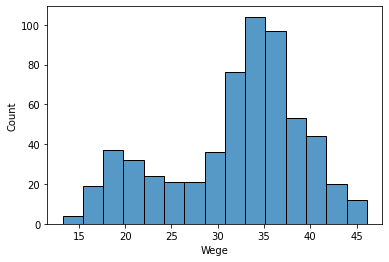

In [53]:
sbn.histplot(ações_df['Wege']);
# Mostrando a freqüência do preço (quantas vezes tal preço aparece) gràficamente
# Para a mensagem <AxesSubplot:xlabel='Gol', ylabel='Count'> é só colocar um ponto-e-vírgula no final
# bins= define o número de barras de freqüência
# Não é obrigatório colocar 'bins' no final

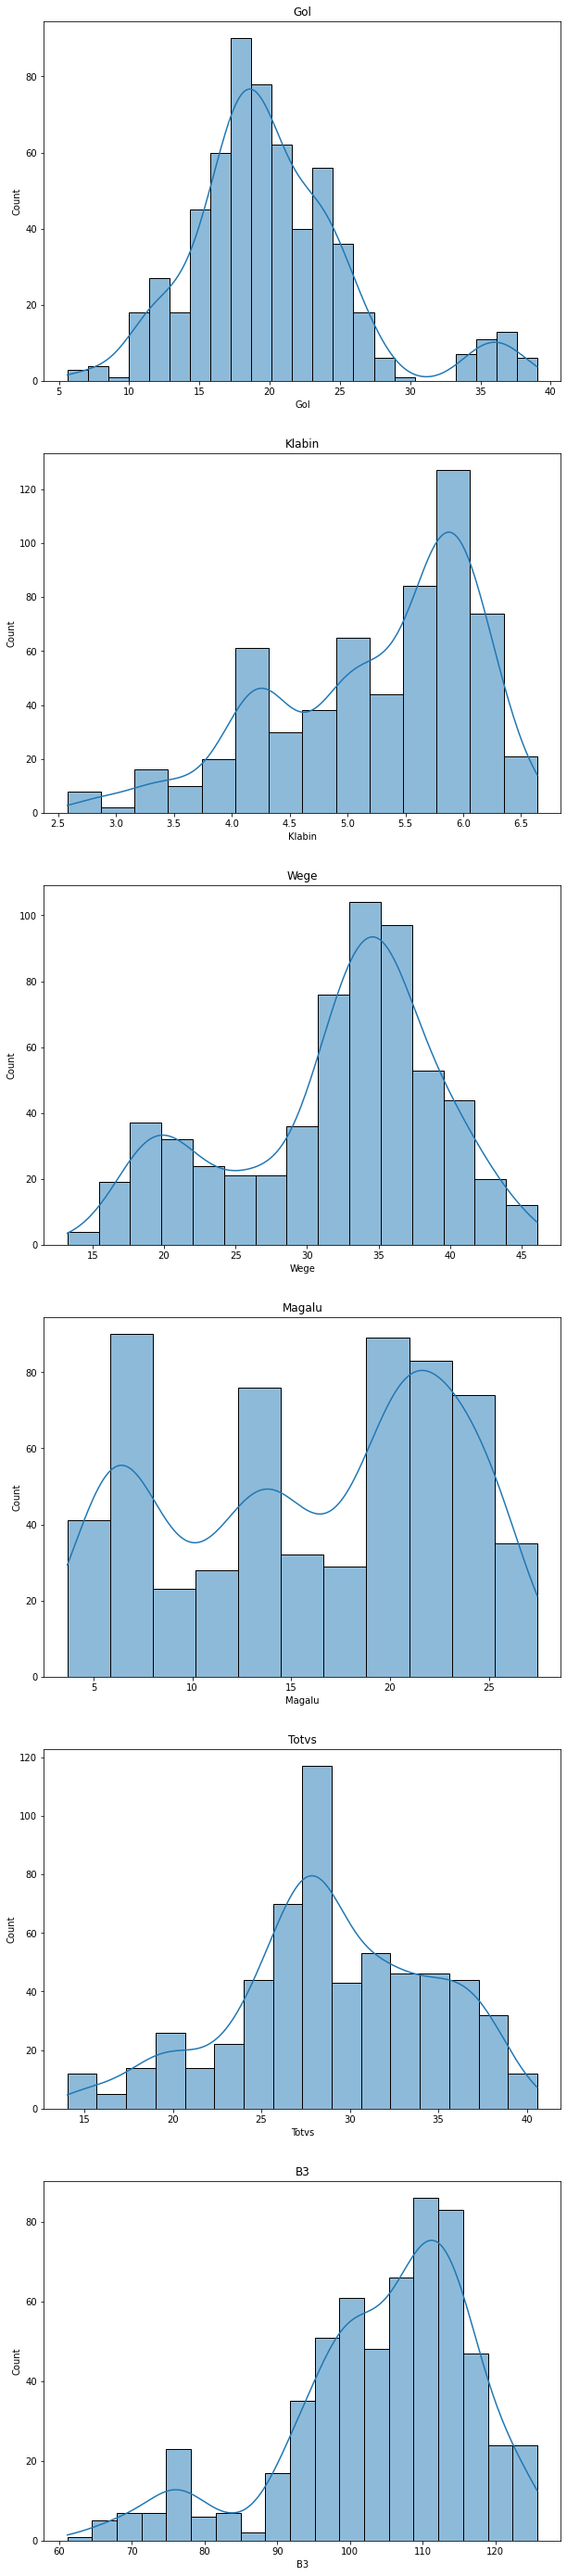

In [92]:
plt.figure(figsize=(10,50))
# Dizendo para o PyPlot que isto é uma figura
# Passando qual será o tamanho da imagem

i=0
# Identificando a partir de qual coluna quero que seja mostrado
# N'êste caso a partir da primeira coluna mesmo

for i in np.arange(0, len(ações_df.columns)):
    # Chamando o NumPy para acessar as colunas em forma de array
    plt.subplot(6, 1, i+1)
        # Fazendo a definição dos gráficos gerando um sub-gráfico
        # 7 = número de linha
        # 1 = número de colunas (caso colocasse mais, ficaria um gráfico do lado do outro)
        # i+1 = identificador do gráfico, cada gráfico precida d'um identicifador único
    sbn.histplot(ações_df[ações_df.columns[i]], kde=True)
        # Fazendo a plotagem dos gráficos em si
        # kde=True = mostra uma linha de densidade
    plt.title(ações_df.columns[i])
        # Borando um título p'ra cada gráfico